In [1]:
import datetime as dt
import numpy as np
from numpy import datetime64 as dt
from numpy import timedelta64 as td
from pathlib import Path
import matplotlib as mpl
from matplotlib import pyplot as plt

import xarray as xr
import warnings
import pandas as pd
import geopandas as gpd

import scipy
from scipy.spatial import Voronoi, voronoi_plot_2d, ConvexHull, SphericalVoronoi
import cartopy.crs as ccrs
from cartopy.crs import Geodetic
import cartopy
from shapely.geometry import Polygon

warnings.simplefilter("ignore")

In [2]:
# Plot relevant parameters
suptitle_size = 20
title_size = 16
mapsize = (16, 8)
extent = (2.5, 27.5, 52, 62)
lonmid = np.mean(extent[:2])
latmid = np.mean(extent[2:])
map_projection = ccrs.Stereographic(central_longitude=lonmid, central_latitude=latmid,)
def basemap(ax):
    ax.set_extent(extent, ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.gridlines(draw_labels=["left", "bottom"], y_inline=False,)
    return ax

In [5]:
# define Paths
folder_path = Path("/gxfs_work/geomar/smomw597/2025_Fucus/")
output_path = Path(folder_path, "output/SamplePoints")
output_SamplePoints = Path(output_path,"SamplePoints.shp")
output_VoronoiPolygons = Path(output_path,"VoronoiPolygons.shp")
output_VoronoiOceanPolygons = Path(output_path,"VoronoiOceanPolygons.shp")

In [80]:
df_stations = pd.read_csv(Path(folder_path,"Station_Coordinates.csv"), index_col="Station_number")
station_dict = dict(
    station = df_stations.Station,
    geometry = gpd.points_from_xy(df_stations.LongitudeE, df_stations.LatitudeN, crs=Geodetic()),
)
gdf_sample_points.to_file(output_SamplePoints)
gdf_sample_points

,station,geometry
Station_number,,
1,Flensburg Fjord,POINT (10.19905 54.45632)
2,Schlei Estuary,POINT (10.03524 54.67693)
3,Kiel Bülk,POINT (10.19959 54.4551)
4,Fehmarn sheltered,POINT (11.09668 54.42839)
5,Fehmarn exposed,POINT (11.18302 54.52108)
6,Trave Estuary,POINT (10.88461 53.97965)
7,Wismar Lagoon,POINT (11.50503 54.05044)
8,Warnow Estuary,POINT (12.07722 54.18235)
9,Hiddensee,POINT (13.09373 54.55866)


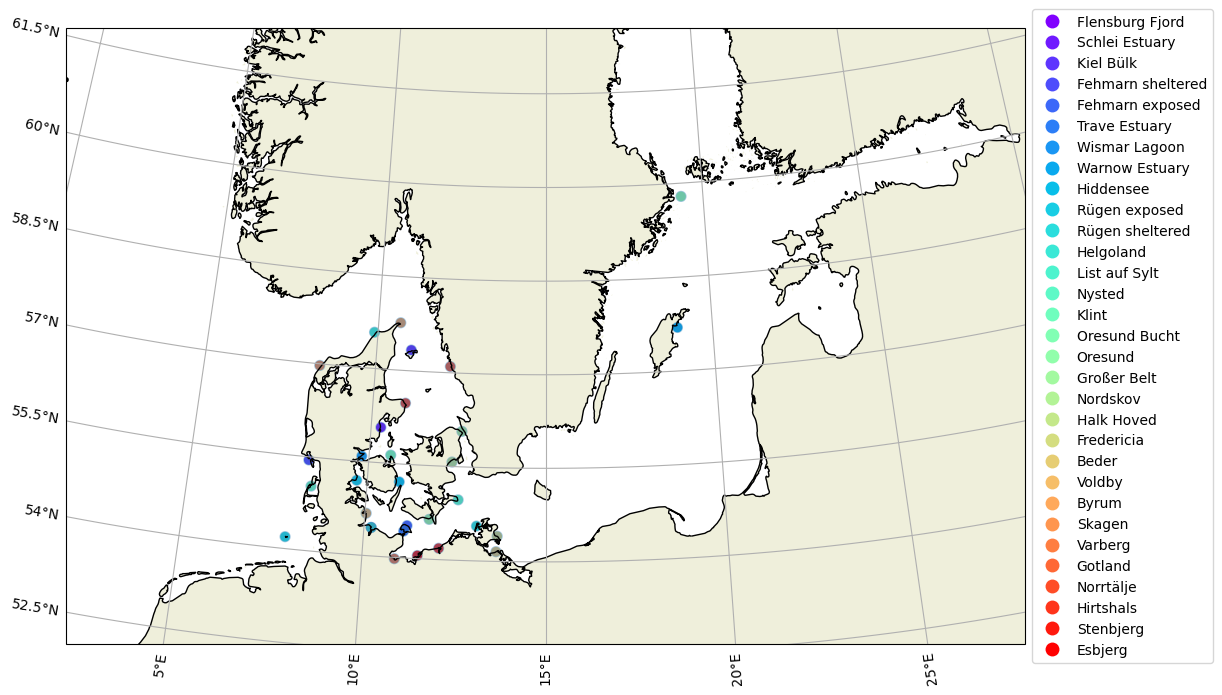

In [105]:
fig = plt.figure(figsize=mapsize)
ax = fig.add_subplot(projection=map_projection)
basemap(ax)
gdf_sample_points.to_crs(map_projection).plot(
                ax=ax, cmap="rainbow", 
                legend_kwds=dict(
                        labels=list(gdf_sample_points.station),
                        bbox_to_anchor=(1, 0.5),
                        loc="center left",
                ),
                column="station",
                k=10,
                legend=True,
        )
release_area.to_crs(map_projection).plot(ax=ax, alpha=0.4)
plt.show()

In [104]:
# Define the the radius of interest around the sample points
centroid = gdf_sample_points.dissolve().centroid.to_crs(Geodetic())
release_area = (
    gpd.GeoDataFrame(
        gdf_sample_points.station,
        geometry=gdf_sample_points.to_crs(
            map_projection
            # use projction, in meters
            # ccrs.Orthographic(
            #     # Set the central position of the Projection to the centroid
            #     central_longitude=centroid.x.values[0], 
            #     central_latitude=centroid.y.values[0]
            #     )
            )
        # Set the Bufferdistance to 125 000 metres
        .buffer(distance=10e3)
        # Reproject to the map projection
        .to_crs(Geodetic())
        )
    )

In [ ]:
release_area.to_file(output_re)


,station,geometry
Station_number,,
1,Flensburg Fjord,"POLYGON ((10.35357 54.4578, 10.35306 54.44899,..."
2,Schlei Estuary,"POLYGON ((10.1906 54.67863, 10.19012 54.66982,..."
3,Kiel Bülk,"POLYGON ((10.35411 54.45658, 10.35359 54.44777..."
4,Fehmarn sheltered,"POLYGON ((11.25111 54.42872, 11.2504 54.41991,..."
5,Fehmarn exposed,"POLYGON ((11.3378 54.52129, 11.33707 54.51248,..."
6,Trave Estuary,"POLYGON ((11.03736 53.98025, 11.03671 53.97144..."
7,Wismar Lagoon,"POLYGON ((11.65804 54.05024, 11.65726 54.04143..."
8,Warnow Estuary,"POLYGON ((12.23072 54.1814, 12.22981 54.1726, ..."
9,Hiddensee,"POLYGON ((13.24861 54.5564, 13.24747 54.5476, ..."


In [ ]:
# Build geodataframe for voronoi polygons
gdf_voronoi = gdf_sample_points.voronoi_polygons()
sample_polygons = { 
    'geometry': gdf_voronoi,
    }
gdf_voronoi = gpd.GeoDataFrame(sample_polygons).to_crs(map_projection)

In [9]:
# Reorder the polygons so that the IDs are correct
gdf_voronoi_polygons = gpd.sjoin(left_df=gdf_voronoi, right_df=gdf_sample_points, how="left", rsuffix="polygon")
gdf_voronoi_polygons.rename(columns={'index_polygon':'index', 'SampleID': 'PolygonID'}, inplace = True)
gdf_voronoi_polygons = gdf_voronoi_polygons.set_index('index').sort_index()

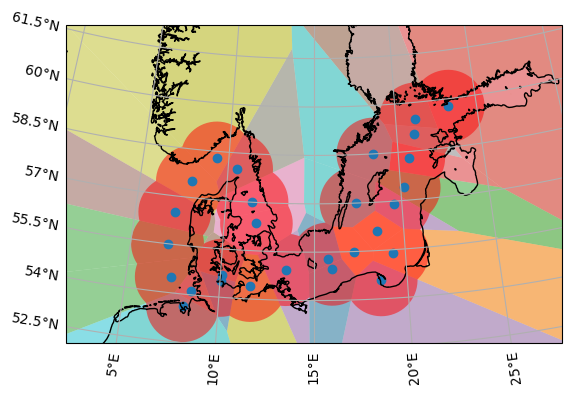

In [10]:
fig = plt.figure()
ax_map = fig.add_subplot(projection=map_projection)
basemap(ax_map)
gdf_voronoi_polygons.plot(ax=ax_map, alpha=0.5, column="PolygonID",)
area_of_interest.plot(ax=ax_map, alpha=0.5, color="r")
gdf_sample_points.plot(ax=ax_map)
plt.show()

In [11]:
gdf_voronoi_clipped = gdf_voronoi_polygons.clip(area_of_interest).sort_index()

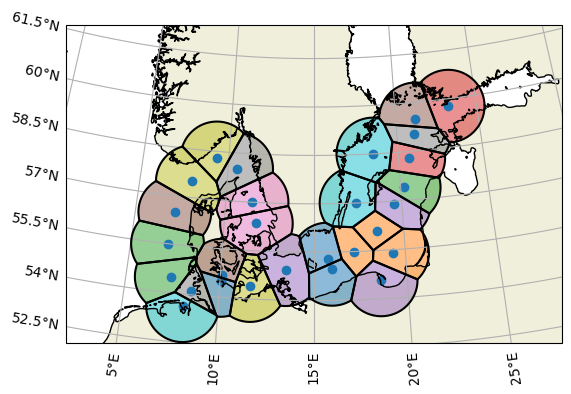

In [12]:
fig = plt.figure()
ax_map = fig.add_subplot(projection=map_projection)
basemap(ax_map)
gdf_voronoi_clipped.plot(ax=ax_map, alpha=0.5, column="PolygonID",)
gdf_voronoi_clipped.boundary.plot(ax=ax_map, color="k",)
gdf_sample_points.plot(ax=ax_map)
map_extent = ax_map.get_extent(crs=map_projection)
plt.show()

In [13]:
gdf_voronoi_clipped.to_file(output_VoronoiPolygons)

In [24]:
ocean_50m = cartopy.feature.NaturalEarthFeature('physical', 'ocean', '50m')

for i, poly in enumerate(ocean_50m.intersecting_geometries(map_extent)):
    if i == 0:
        polygon = list([poly])
    else:
        polygon.append(poly)
ocean_poly = gpd.GeoDataFrame({'geometry':polygon}, crs=Geodetic()).to_crs(map_projection).clip(area_of_interest)
ocean_poly
gdf_voronoi_ocean = gdf_voronoi_clipped.clip(ocean_poly).sort_index()
# devide by 10^6 because the unit we need is km^2 while th output unit is m^2
gdf_voronoi_ocean['area'] = gdf_voronoi_ocean.clip(ocean_poly).sort_index().area/1e6
gdf_voronoi_ocean

,geometry,PolygonID,SampleKind,order,area
index,,,,,
0,"MULTIPOLYGON (((-405759.252 -184049.375, -4029...",KB03,real,11,7131.761408
1,"POLYGON ((-254071.962 -228942.318, -255090.543...",SW08,real,13,9176.559548
2,"POLYGON ((-269963.882 -270316.108, -273132.878...",BE01,real,12,930.554160
3,"POLYGON ((204618.036 -196163.794, 316799.647 -...",GD01,real,19,6573.512733
4,"POLYGON ((242882.202 275118.952, 225673.069 29...",IU07,real,28,21011.796150
5,"POLYGON ((428608.732 260926.853, 433648.978 25...",LL17,real,27,12120.685177
6,"POLYGON ((376387.286 395614.452, 382180.529 39...",FI01,real,29,18398.696027
7,"POLYGON ((-479346.261 -304535.461, -414663.882...",SK02,moved,1,5747.241367
8,"POLYGON ((-424311.271 -335177.235, -426399.783...",WH02,moved,0,5212.630008


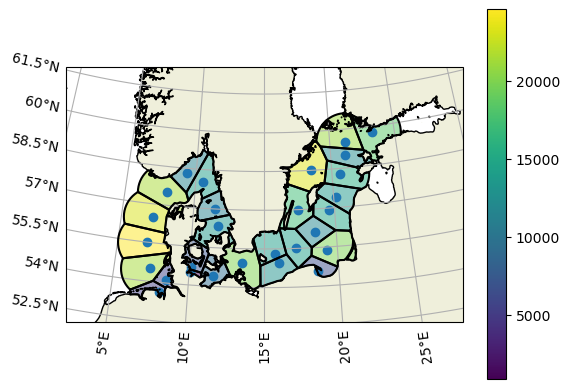

In [20]:
fig = plt.figure()
ax_map = fig.add_subplot(projection=map_projection)
basemap(ax_map)
gdf_voronoi_ocean.plot(ax=ax_map, alpha=0.5, column="area", legend=True)
gdf_voronoi_ocean.boundary.plot(ax=ax_map, color="k",)
gdf_sample_points.plot(ax=ax_map)
plt.show()

In [21]:
gdf_voronoi_ocean.to_file(output_VoronoiOceanPolygons)

In [29]:
gdf_sample_points.to_file(output_SamplePoints)

In [30]:
data_path_static_files = Path("/gxfs_work/geomar/smomw122/bsh_operationalmodel_data")
data_path_static_fine = data_path_static_files / "static_file_fine"
data_path_static_coarse = data_path_static_files / "static_file_coarse"
H0_file_fine = data_path_static_fine / "H0_file_fine.nc"
H0_file_coarse = data_path_static_coarse / "H0_file_coarse.nc"
mask_land_fine = xr.open_dataset(H0_file_fine).H0.isnull()
mask_land_coarse = xr.open_dataset(H0_file_coarse).H0.isnull()

In [13]:
from shapely.geometry import Polygon
finebox = Polygon([
    (mask_land_fine.lon.min().values, mask_land_fine.lat.min().values),
    (mask_land_fine.lon.max().values, mask_land_fine.lat.min().values),
    (mask_land_fine.lon.max().values, mask_land_fine.lat.max().values),
    (mask_land_fine.lon.min().values, mask_land_fine.lat.max().values),
    (mask_land_fine.lon.min().values, mask_land_fine.lat.min().values),
    ])

In [14]:
coarsebox = Polygon([
    (mask_land_coarse.lon.min().values, mask_land_coarse.lat.min().values),
    (mask_land_coarse.lon.max().values, mask_land_coarse.lat.min().values),
    (mask_land_coarse.lon.max().values, mask_land_coarse.lat.max().values),
    (mask_land_coarse.lon.min().values, mask_land_coarse.lat.max().values),
    (mask_land_coarse.lon.min().values, mask_land_coarse.lat.min().values),
    ])

In [ ]:
(mask_land_fine.lon.min().values, mask_land_fine.lat.min())

(array(6.1736),
 <xarray.DataArray 'lat' ()> Size: 8B
 array(53.2292))

In [16]:
gdf_land_fine = gpd.GeoDataFrame(
    mask_land_fine.to_dataframe().reset_index().H0,
    geometry=gpd.points_from_xy(
        mask_land_fine.to_dataframe().reset_index().lon,
        mask_land_fine.to_dataframe().reset_index().lat,
        crs=ccrs.Geodetic()
        )
    )
# mask_land_fine.to_dataframe().reset_index()

In [17]:
gdf_land_coarse = gpd.GeoDataFrame(
    mask_land_coarse.to_dataframe().reset_index().H0,
    geometry=gpd.points_from_xy(
        mask_land_coarse.to_dataframe().reset_index().lon,
        mask_land_coarse.to_dataframe().reset_index().lat,
        crs=ccrs.Geodetic()
        ).difference(finebox)
    )
# mask_land_fine.to_dataframe().reset_index()
# gdf_land_coarse = gdf_land_coarse.difference(finebox)


In [18]:
gdf_land = pd.concat([gdf_land_coarse,gdf_land_fine])

In [19]:
gdf_land = gdf_land.clip(gdf_voronoi_clipped.to_crs(Geodetic()))

<Axes: >

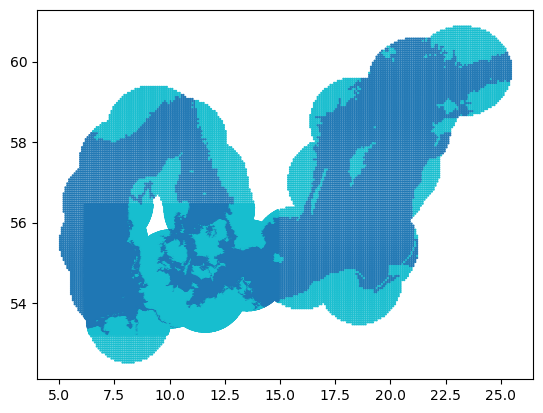

In [20]:
gdf_land.plot(column="H0", markersize=0.5)

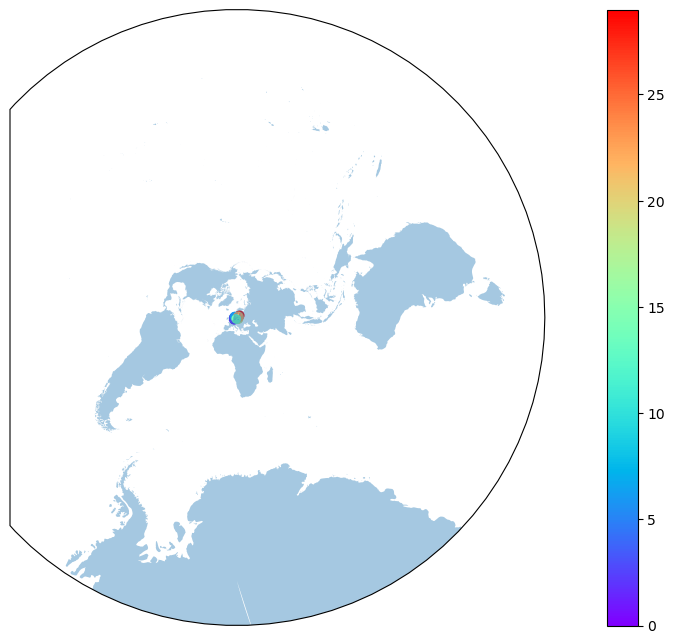

In [212]:
land_50m = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',)
fig = plt.figure(figsize=mapsize)
ax_map = fig.add_subplot(projection=map_projection)
gdf_sample_points.plot(ax=ax_map, column="order", cmap='rainbow', legend=True)
# ax_map.add_geometries(polygon, crs=map_projection)
# land_poly.to_crs(map_projection).plot(ax=ax_map)
area_of_interest.plot(ax=ax_map, alpha=0.4)
land_poly.plot(ax=ax_map, alpha=0.4)
plt.show()

(-553166.2002694239, 512284.4127183999, -386693.0263192243, 371585.0571993857)


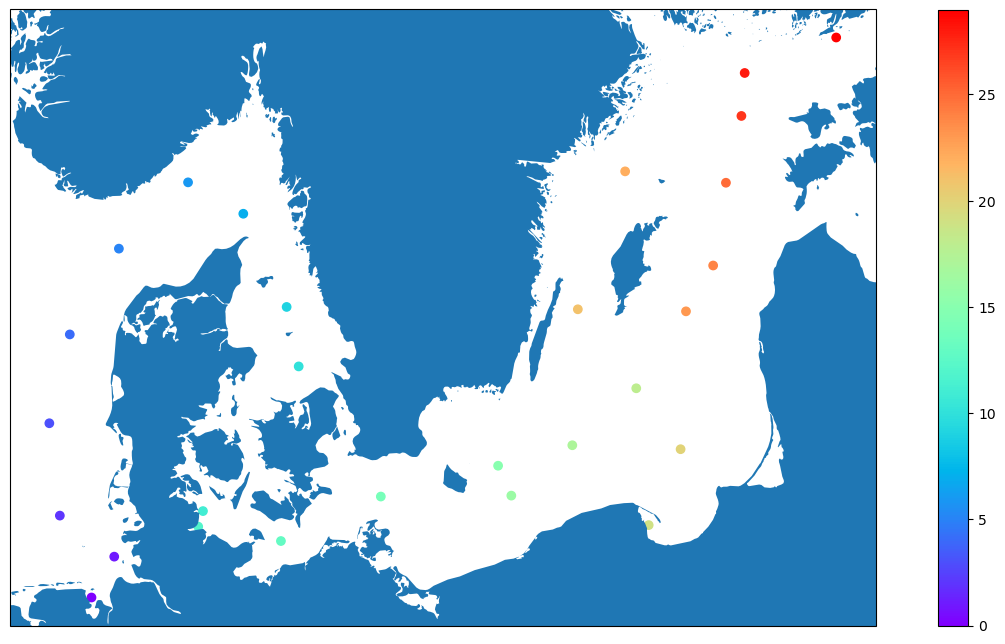

In [81]:
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',)
fig = plt.figure(figsize=mapsize)
ax_map = fig.add_subplot(projection=map_projection)
gdf_sample_points.plot(ax=ax_map, column="order", cmap='rainbow', legend=True)
ax_map.add_feature(land_10m)
a = print(ax_map.get_extent(crs=map_projection))
plt.show()


In [21]:
voronoi_outlines_polygon = gdf_voronoi_clipped.to_crs(Geodetic()).polygonize()

In [30]:
gdf_land

,H0,geometry
238543,True,POINT (11.7708 53.2958)
238545,True,POINT (11.7986 53.2958)
238541,True,POINT (11.7431 53.2958)
238534,True,POINT (11.6458 53.2958)
237923,True,POINT (11.9097 53.3042)
...,...,...
69758,True,POINT (13.125 57.475)
69344,True,POINT (13.125 57.525)
68930,True,POINT (13.125 57.575)
68516,True,POINT (13.125 57.625)


In [31]:
gdf_land_raster = gpd.GeoDataFrame(
    gdf_land.H0,
    geometry=gdf_land.voronoi_polygons(
        extend_to=voronoi_outlines_polygon[0]
        )
)#.to_crs(Geodetic())

<Axes: >

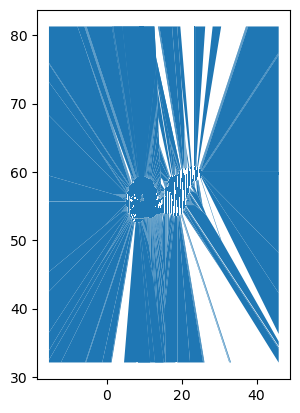

In [29]:
gdf_land_raster.plot()

<Axes: >

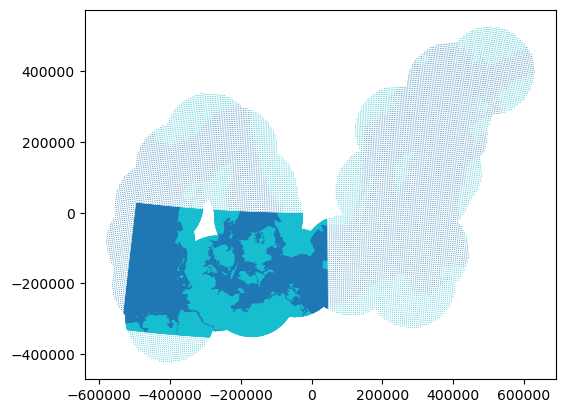

In [396]:
gpd.GeoDataFrame(
    gdf_land.H0,
    geometry=gdf_land.to_crs(
            ccrs.Orthographic(
                # Set the central position of the Projection to the centroid
                central_longitude=centroid.x.values[0], 
                central_latitude=centroid.y.values[0]
                )
            ).buffer(distance=1.25e3)
).plot(column="H0")

In [232]:
gdf_test_raster = gdf_land_raster.clip(gdf_voronoi_clipped.to_crs(Geodetic()))

<Axes: >

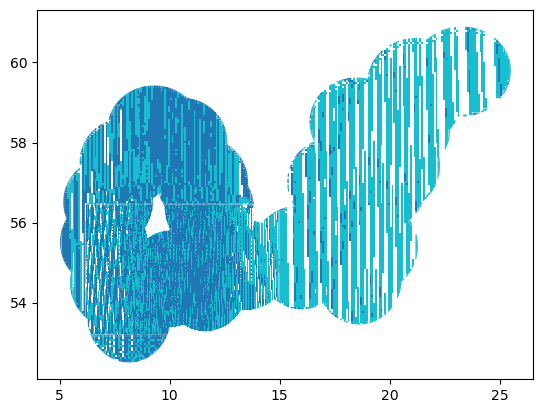

In [252]:
gdf_test_raster.plot(column="H0")

<Axes: >

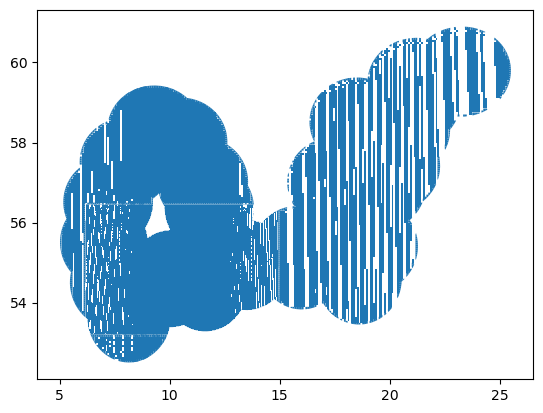

In [199]:
gdf_test_raster.plot()#.where(gdf_test_raster.H0==False).dropna().plot()

KeyboardInterrupt: 

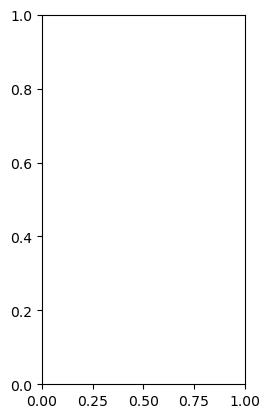

In [149]:
gdf_land_raster.where(gdf_land_raster.H0==True).plot()#.intersects(gdf_voronoi_clipped)
# gdf_voronoi_clipped.intersection(gdf_land_raster)

<Axes: >

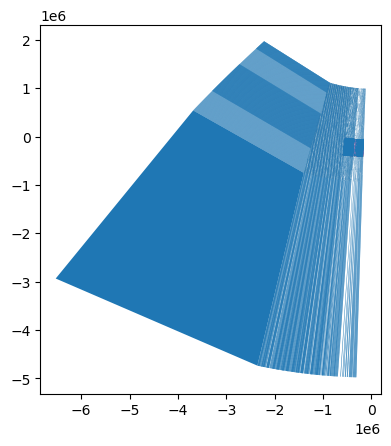

In [30]:
gdf_land_raster.where(gdf_land_raster.H0==True).dropna().plot()

In [267]:
gdf_voronoi_clipped.clip(mask_land_fine)

TypeError: If 'mask' is list-like, it must have four values (minx, miny, maxx, maxy)

In [32]:
df = ds_trajectories.get(["lat","lon"]).to_dataframe().reset_index().dropna()
print(df.size/1e9)

NameError: name 'ds_trajectories' is not defined

In [21]:
gdf_traj = gpd.GeoDataFrame(
    df.trajectory,
    geometry=gpd.points_from_xy(df.lon, df.lat, crs=ccrs.Geodetic())
    )

In [22]:
nrows_half = np.round(len(gdf_traj)/2).astype("int")

In [23]:
gdf_projected = gdf_traj[:nrows_half].to_crs(map_projection)
print("projected")
gdf_projected = gpd.sjoin(left_df=gdf_projected, right_df=gdf_voronoi, how="left", rsuffix="polygon")
print("joined")
gdf_projected_second = gdf_traj[nrows_half:].to_crs(map_projection)
print("projected")
gdf_projected_second = gpd.sjoin(left_df=gdf_projected_second, right_df=gdf_voronoi, how="left", rsuffix="polygon")
print("joined")

projected
joined
projected
joined


In [37]:
gdf_projected = pd.concat([gdf_projected, gdf_projected_second])

NameError: name 'gdf_projected' is not defined

NameError: name 'gdf_projected' is not defined

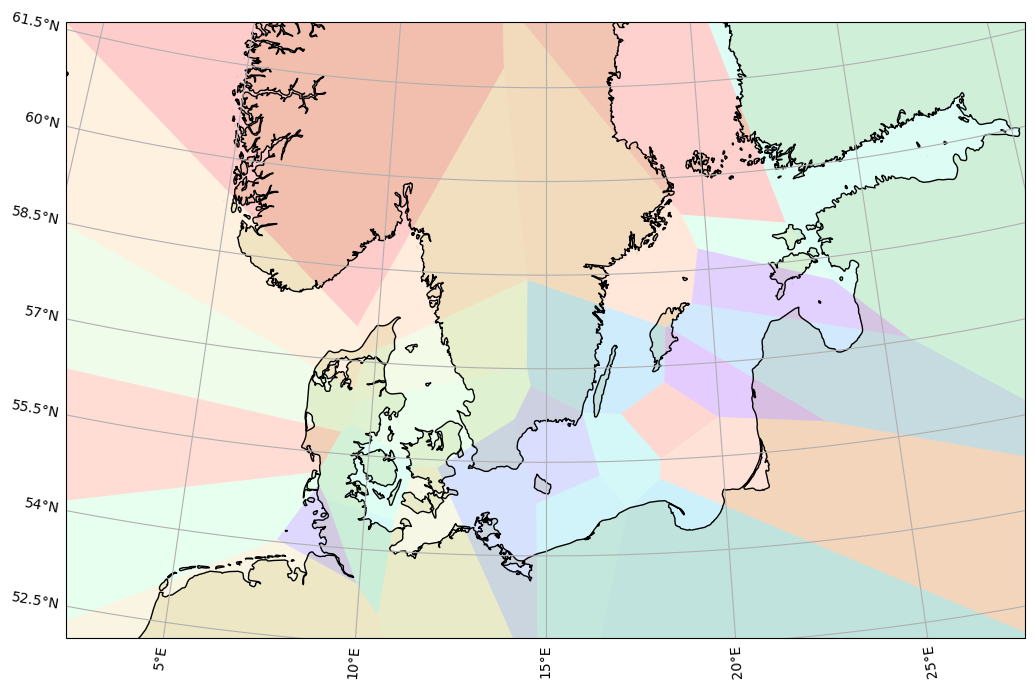

In [36]:
fig = plt.figure(figsize=mapsize)
ax_map = fig.add_subplot(projection=map_projection)
basemap(ax_map)
gdf_voronoi.to_crs(map_projection).plot(ax=ax_map,alpha=0.2, column="SampleID", cmap="rainbow")
gdf_projected[::24*400].plot(ax=ax_map, column="SampleID", cmap="rainbow", s=1)
gdf_voronoi.boundary.to_crs(map_projection).plot(ax=ax_map, color="k",)
gdf_sample_points.plot(ax=ax_map, column="SampleKind", legend=True, )
plt.show()

<Axes: ylabel='Frequency'>

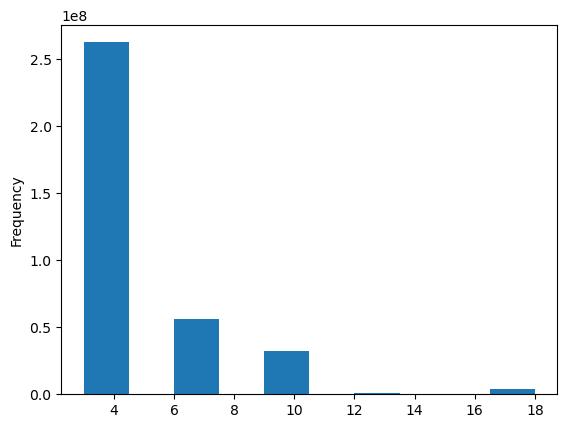

In [20]:
gdf_projected.index_polygon.plot.hist()

In [11]:
# save the data array to a file
# if isPapermill == True:
daily_data.to_netcdf(
    Path(out_path+f"ds_dispersal_{year}_{site_name}.nc")
)